In [1]:
def parse_instek(file):
    """Parses GW-Instek scope waveform CSV files

    This parses the input file and returns data scaled
    in Volts and a timebase in seconds starting where
    the scope screen displays as 0 seconds
    
    Parameters
    ----------
    file : str
        The GW-Instek scope .csv file you would like to
        parse like "A0003CH1.CSV"

    Returns
    -------
    voltages : ndarray
        An array of voltages that are hopefully
        properly scaled
    times : ndarray
        An array of times where 0 is roughly what
        the scope displays at time 0
    metadata : dict
        The metadata from the scope as a dictionary
        this is probably not stable because these
        scopes kinda suck
    """
    import pandas as pd
    import numpy as np
    isint = lambda s: s.isnumeric() or (len(s) > 1 and s[1:].isnumeric())
    data = pd.read_csv(file, names=[0, 1, 2])
    pivot = 0
    while not isint(data[0][pivot]):
        pivot += 1
    metadata = {data[0][i] : data[1][i] for i in range(0, pivot - 1)}
    data_raw = np.array([int(i) for i in data[0][pivot:]])
    times = np.arange(len(data_raw))*float(metadata['Sampling Period'])
    voltages = data_raw*float(metadata['Vertical Scale'])/25
    return voltages, times - np.max(times)/2, metadata

vs, times, metadata = parse_instek("./ALL0003/A0003CH1.CSV")

{'Memory Length': '4000',
 'Trigger Level': '-3.99999e+02',
 'Source': 'CH1',
 'Probe': '1.0X',
 'Vertical Units': 'V',
 'Vertical Scale': '1.00000e+00',
 'Vertical Position': '0.00000e+00',
 'Horizontal Units': 'S',
 'Horizontal Scale': '5.00000e-05',
 'Horizontal Position': '2.0000000e-05',
 'Horizontal Mode': 'Main',
 'Sampling Period': '2.00000e-07',
 'Firmware': 'V1.09',
 'Time': ' ',
 'Mode': 'Fast'}

0.00019994999999999998

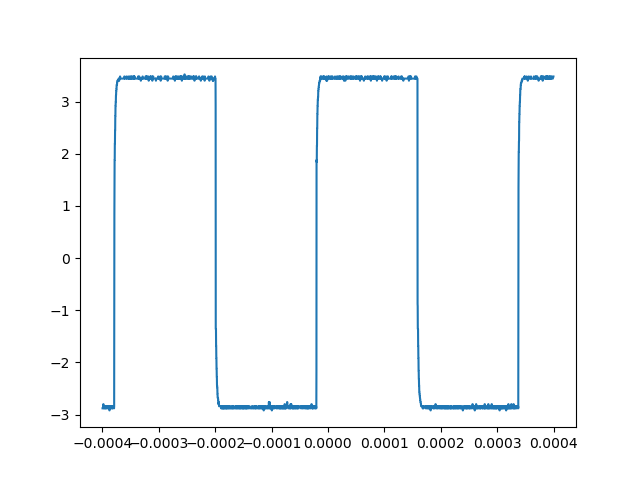

In [2]:
%matplotlib widget

import matplotlib.pyplot as plt

plt.plot(times, data)
#plt.xlim(0.00038, 0.00038 + 4*5e-5)
np.max(times) / 2